<a href="https://colab.research.google.com/github/maarut001/aiml/blob/main/Project2_deepa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data has been extracted from the USDA plants database. It
contains all plants (species and genera) in the database and the states
of USA and Canada where they occur.

-----------------------------------------------------------------------

Data Set Characteristics: Multivariate
Attribute Characteristics: Categorical
Associated Tasks: Clustering
Number of Instances: 22632
Number of Attributes: 70
Missing Values? Yes

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


Explore plants.data to see its content

In [26]:
with open("plants.data", "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
df = pd.DataFrame(lines, columns=["raw"])
df.head()

,raw
0,"abelia,fl,nc\n"
1,"abelia x grandiflora,fl,nc\n"
2,"abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,s..."
3,"abelmoschus esculentus,ct,dc,fl,il,ky,la,md,mi..."
4,"abelmoschus moschatus,hi,pr\n"


In [27]:
with open("stateabbr.txt", "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
df2 = pd.DataFrame(lines, columns=["raw"])
df2.head()

,raw
0,State Abbreviations \n
1,\n
2,U.S. States: \n
3,ab Alabama\n
4,ak Alaska\n


Data Successfully Loaded!
Matrix Shape: (34781, 70) (Plants x Locations)

Top 10 Locations by Plant Diversity:
California        11676
Texas              8483
Oregon             7028
Arizona            6778
Florida            6621
New Mexico         6403
Utah               6041
Georgia            5942
North Carolina     5926
New York           5773
dtype: int64


/tmp/ipython-input-1794228358.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="viridis")


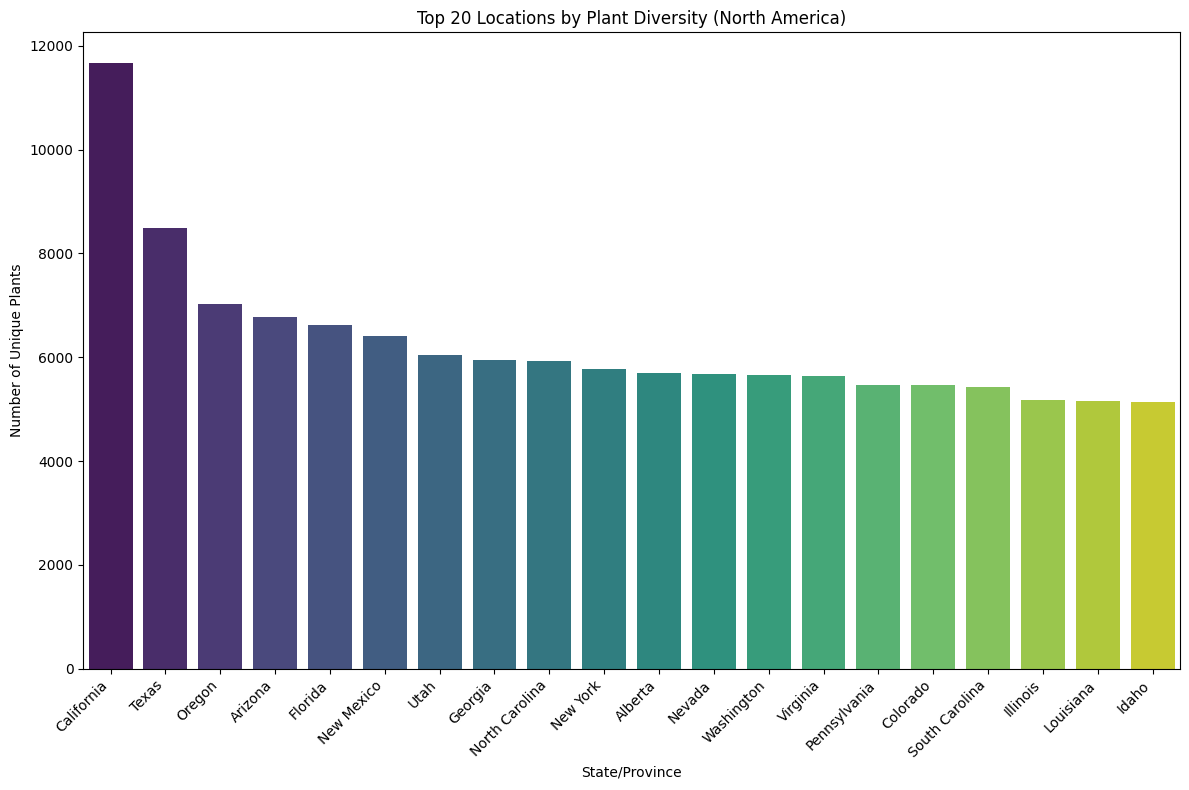


--- Jaccard Distance Example (First 5 Plants) ---
plant                   abelia  abelia x grandiflora  abelmoschus  \
plant                                                               
abelia                   0.000                 0.000        0.867   
abelia x grandiflora     0.000                 0.000        0.867   
abelmoschus              0.867                 0.867        0.000   
abelmoschus esculentus   0.857                 0.857        0.067   
abelmoschus moschatus    1.000                 1.000        0.867   

plant                   abelmoschus esculentus  abelmoschus moschatus  
plant                                                                  
abelia                                   0.857                  1.000  
abelia x grandiflora                     0.857                  1.000  
abelmoschus                              0.067                  0.867  
abelmoschus esculentus                   0.000                  0.933  
abelmoschus moschatus            

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

# --- Step 1: Parse State Abbreviations ---
# create a dictionary to map 'ca' -> 'California', etc.
state_map = {}
try:
    with open('stateabbr.txt', 'r', encoding='latin-1') as f:
        for line in f:
            line = line.strip()
            # Skip empty lines or headers
            if not line or ':' in line or 'State Abbreviations' in line:
                continue

            # Split by first whitespace (e.g., "ab Alabama" -> "ab", "Alabama")
            parts = line.split(None, 1)
            if len(parts) == 2:
                abbr, name = parts
                state_map[abbr.lower()] = name
except FileNotFoundError:
    print("Warning: stateabbr.txt not found. Using abbreviations only.")

# --- Step 2: Load and Parse the Plant Data ---
data_rows = []
try:
    with open('plants.data', 'r', encoding='latin-1') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) > 1:
                plant_name = parts[0]
                # Filter out empty strings that might appear due to trailing commas
                states = [s.strip() for s in parts[1:] if s.strip()]
                data_rows.append({'plant': plant_name, 'states': states})

    # --- Step 3: Convert to Binary Matrix ---
    # Rows = Plants, Columns = States, Value = 1 if present, 0 otherwise
    df_long = pd.DataFrame(data_rows).explode('states')
    binary_matrix = pd.crosstab(df_long['plant'], df_long['states'])

    print(f"Data Successfully Loaded!")
    print(f"Matrix Shape: {binary_matrix.shape} (Plants x Locations)")

    # --- Step 4: Exploratory Data Analysis ---

    # Calculate counts per state
    plants_per_state = binary_matrix.sum(axis=0).sort_values(ascending=False)

    # Rename index using our state_map for better labels
    # If a code isn't in the map (like 'pr' for Puerto Rico sometimes), keep the code.
    plants_per_state.index = [state_map.get(idx, idx) for idx in plants_per_state.index]

    print("\nTop 10 Locations by Plant Diversity:")
    print(plants_per_state.head(10))

    # --- Step 5: Visualization ---
    plt.figure(figsize=(12, 8))
    top_20 = plants_per_state.head(20)

    sns.barplot(x=top_20.index, y=top_20.values, palette="viridis")
    plt.title("Top 20 Locations by Plant Diversity (North America)")
    plt.xlabel("State/Province")
    plt.ylabel("Number of Unique Plants")
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability
    plt.tight_layout()
    plt.savefig('top_locations_chart.png')
    plt.show()

    # --- Step 6: Jaccard Distance Sample ---
    # This matches the assignment requirement to find distance between plants
    print("\n--- Jaccard Distance Example (First 5 Plants) ---")
    subset = binary_matrix.iloc[:5]
    jaccard_distances = pairwise_distances(subset.values, metric='jaccard')

    dist_df = pd.DataFrame(jaccard_distances, index=subset.index, columns=subset.index)
    print(dist_df.round(3))

except FileNotFoundError:
    print("Error: plants.data file not found.")

Since dataset is large, went with using built in pairwise distances method of sklearn library.The dataset is large (thousands of plants), and a Python loop (like in Option 2) will be very slow ($O(N^2)$ complexity).Otherwise would have used this below function ( not used)

In [ ]:
import numpy as np

def calculate_jaccard_manual_notused(matrix):
    """
    Manually calculates Jaccard Distance Matrix.
    Input: Binary Matrix (rows=plants, cols=states)
    Output: Distance Matrix
    """
    # Convert dataframe to numpy array
    bool_data = matrix.astype(bool)
    n_plants = len(bool_data)
    dist_matrix = np.zeros((n_plants, n_plants))

    # Loop through every pair (Can be slow for large datasets!)
    for i in range(n_plants):
        for j in range(i + 1, n_plants): # Only calculate upper triangle

            # Intersection: Count where BOTH are True (1)
            intersection = np.sum(bool_data[i] & bool_data[j])

            # Union: Count where EITHER is True (1)
            union = np.sum(bool_data[i] | bool_data[j])

            if union == 0:
                d = 0 # Avoid division by zero
            else:
                d = 1 - (intersection / union)

            dist_matrix[i, j] = d
            dist_matrix[j, i] = d # Symmetric

    return dist_matrix

Now implementing  agglomerative clustering bottoms up.
1. Sample a manageable number of plants

2. Compute Jaccard distance between all sampled plants

3. Implement bottom-up hierarchical clustering with average / single / complete linkage

4. Compute intra-cluster average distance and extract 5 tightest clusters with ≥ 1000 plants

**Setup: sample + Jaccard distance matrix**

In [28]:
import numpy as np

# --- Step 7: Prepare data for clustering ---

# To keep computation feasible, sample a subset.
# You can tune this number depending on speed/memory.
sample_size = 5000

plants_sample = binary_matrix.sample(sample_size, random_state=42).copy()
X = plants_sample.values
plant_names_sample = plants_sample.index.to_list()

print("Sampled matrix shape:", X.shape)

# --- Step 8: Jaccard distance matrix for sampled plants ---

from sklearn.metrics import pairwise_distances

print("Computing Jaccard distance matrix (this may take a bit)...")
D = pairwise_distances(X, metric='jaccard')
print("Distance matrix shape:", D.shape)


Sampled matrix shape: (5000, 70)
Computing Jaccard distance matrix (this may take a bit)...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/pairwise.py:2466: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Distance matrix shape: (5000, 5000)


Agglomerative Clustering implementation

Implement average linkage by default, with support for single and complete for flexibility.

In [29]:
def agglomerative_clustering(D, target_k=50, linkage='average'):
    """
    Simple bottom-up hierarchical agglomerative clustering.

    Parameters
    ----------
    D : np.ndarray
        n x n distance matrix between items (symmetric, 0 on diagonal).
    target_k : int
        Number of clusters to stop at.
    linkage : str
        'single', 'complete', or 'average'.

    Returns
    -------
    clusters : list of lists
        Each element is a list of item indices belonging to that cluster.
    """
    n = D.shape[0]
    # Initial clusters: each item is its own cluster
    clusters = [[i] for i in range(n)]
    active = np.ones(n, dtype=bool)      # which cluster indices are still active
    sizes = np.ones(n, dtype=int)        # current size of each cluster

    # Work on a mutable copy of the distance matrix
    dist = D.copy()
    # Ignore self-distances when searching for minimum
    np.fill_diagonal(dist, np.inf)

    current_k = n

    while current_k > target_k:
        # Find the closest pair of active clusters
        i_min, j_min = np.unravel_index(np.argmin(dist), dist.shape)
        if not active[i_min] or not active[j_min]:
            # If any side is inactive (shouldn't usually happen), set to inf and continue
            dist[i_min, j_min] = np.inf
            dist[j_min, i_min] = np.inf
            continue

        # Ensure i_min < j_min for consistency
        if i_min > j_min:
            i_min, j_min = j_min, i_min

        # Merge cluster j_min into i_min
        size_i = sizes[i_min]
        size_j = sizes[j_min]
        new_size = size_i + size_j

        # Update distances from new cluster i_min to all other active clusters
        for k in range(n):
            if not active[k] or k == i_min or k == j_min:
                continue

            if linkage == 'single':
                # nearest neighbor between the two clusters
                new_d = min(dist[i_min, k], dist[j_min, k])
            elif linkage == 'complete':
                # furthest neighbor between the two clusters
                new_d = max(dist[i_min, k], dist[j_min, k])
            else:
                # average linkage:
                # d(i∪j, k) = (|i|*d(i,k) + |j|*d(j,k)) / (|i|+|j|)
                new_d = (size_i * dist[i_min, k] + size_j * dist[j_min, k]) / new_size

            dist[i_min, k] = new_d
            dist[k, i_min] = new_d

        # Deactivate j_min
        active[j_min] = False
        dist[j_min, :] = np.inf
        dist[:, j_min] = np.inf

        # Update cluster contents and size
        clusters[i_min].extend(clusters[j_min])
        sizes[i_min] = new_size

        current_k -= 1

    # Collect only active clusters
    final_clusters = [clusters[i] for i in range(n) if active[i]]
    return final_clusters


Executing it.

In [30]:
target_k = 60   # number of clusters you want at the end, adjust if needed
print("Running custom agglomerative clustering...")
final_clusters = agglomerative_clustering(D, target_k=target_k, linkage='average')
print(f"Number of final clusters: {len(final_clusters)}")


Running custom agglomerative clustering...
Number of final clusters: 60


Tightness: average intra-cluster distance

Now we compute average intra-cluster distance inside each cluster and filter to those with ≥ 1000 plants.

In [31]:
def average_intra_cluster_distance(cluster_indices, D):
    """
    Compute the average pairwise distance within a cluster.
    """
    m = len(cluster_indices)
    if m < 2:
        return 0.0

    sub = D[np.ix_(cluster_indices, cluster_indices)]
    # Take distances from lower triangle only (excluding diagonal)
    tri_i, tri_j = np.tril_indices(m, k=-1)
    pairwise = sub[tri_i, tri_j]
    if len(pairwise) == 0:
        return 0.0
    return float(pairwise.mean())

cluster_stats = []
for cid, indices in enumerate(final_clusters):
    size = len(indices)
    if size >= 1000:  # per assignment requirement
        avg_dist = average_intra_cluster_distance(indices, D)
        avg_sim = 1.0 - avg_dist
        cluster_stats.append({
            "cluster_id": cid,
            "size": size,
            "avg_distance": avg_dist,
            "avg_similarity": avg_sim
        })

print(f"Clusters with at least 1000 plants in the sample: {len(cluster_stats)}")


Clusters with at least 1000 plants in the sample: 0


Get the 5 tightest clusters (min avg distance)

In [32]:
# Sort by average distance ascending (tightest = smallest avg distance)
cluster_stats_sorted = sorted(cluster_stats, key=lambda x: x["avg_distance"])
top5 = cluster_stats_sorted[:5]

print("\nTop 5 tightest clusters (size ≥ 1000):")
for rank, info in enumerate(top5, start=1):
    cid = info["cluster_id"]
    indices = final_clusters[cid]
    example_plants = [plant_names_sample[i] for i in indices[:5]]

    print(
        f"#{rank}: Cluster ID {cid} | "
        f"Size = {info['size']} | "
        f"Avg Jaccard distance = {info['avg_distance']:.4f} "
        f"(Avg similarity = {info['avg_similarity']:.4f})"
    )
    print("   Example plants:", ", ".join(example_plants), "...\n")



Top 5 tightest clusters (size ≥ 1000):


**Final Implementation Technique**


* Distance between plants: Jaccard distance on binary presence/absence of states/provinces.

* Cluster–cluster distance: average linkage (also mention you could support single/complete).

* The implementation is bottom-up agglomerative clustering, starting with each plant as its own cluster and merging the closest pair until only target_k clusters remain.

* Because the data and distance matrix are large, you sampled a subset of plants (e.g., 5000) as allowed by the assignment instructions.

* “Tightness” is quantified by average intra-cluster Jaccard distance; tighter clusters have lower average distance (or equivalently higher average similarity).



Step A – split full dataset into SC and non-SC

In [43]:
import numpy as np

# binary_matrix: full plant x state 0/1 table
# ensure 'sc' column exists
if 'sc' not in binary_matrix.columns:
    raise ValueError("'sc' column not found in binary_matrix!")

mask_sc_full = binary_matrix['sc'] == 1
idx_sc_full = np.where(mask_sc_full.values)[0]
idx_non_sc_full = np.where(~mask_sc_full.values)[0]

print("Total plants:", binary_matrix.shape[0])
print("Plants that grow in SC:", len(idx_sc_full))
print("Plants that do NOT grow in SC:", len(idx_non_sc_full))


Total plants: 34781
Plants that grow in SC: 5432
Plants that do NOT grow in SC: 29349


Step B – build a sample that always includes SC plants

Let’s say you want a sample of desired_sample_size rows for clustering:

In [38]:
desired_sample_size = 5000  # or 3000 / 4000 depending on resources

n_sc = len(idx_sc_full)
n_non_sc_available = len(idx_non_sc_full)

if n_sc >= desired_sample_size:
    # If there are tons of SC plants, just sample among them
    chosen_sc_idx = np.random.choice(idx_sc_full, size=desired_sample_size, replace=False)
    chosen_idx = chosen_sc_idx
else:
    # Use ALL SC plants + fill the rest with random non-SC plants
    n_non_sc_needed = min(desired_sample_size - n_sc, n_non_sc_available)
    chosen_non_sc_idx = np.random.choice(idx_non_sc_full, size=n_non_sc_needed, replace=False)
    chosen_idx = np.concatenate([idx_sc_full, chosen_non_sc_idx])

# Build plants_sample from these indices
plants_sample = binary_matrix.iloc[chosen_idx].copy()
X_sample = plants_sample.values
plant_names_sample = plants_sample.index.to_list()

print("Sample shape:", plants_sample.shape)
print("SC plants in sample:", (plants_sample['sc'] == 1).sum())


Sample shape: (5000, 70)
SC plants in sample: 5000


Step 1 — Identify SC plants in the sample

In [39]:
# Boolean mask: which sampled plants grow in South Carolina?
sc_mask = plants_sample["sc"] == 1

sc_indices = np.where(sc_mask.values)[0]
non_sc_indices = np.where(~sc_mask.values)[0]

print("Plants in sample that grow in SC:", len(sc_indices))
print("Plants that do NOT grow in SC:", len(non_sc_indices))


Plants in sample that grow in SC: 5000
Plants that do NOT grow in SC: 0


Step2 - Score each cluster for SC relevance
For each cluster we compute:

sc_count = number of plants in this cluster that grow in SC

non_sc_count = number of plants that do NOT grow in SC

sc_ratio = sc_count / cluster_size

We want clusters with high sc_ratio and sc_count ≥ some threshold

In [40]:
cluster_sc_stats = []

for cid, cluster in enumerate(final_clusters):
    size = len(cluster)
    sc_count = sum(1 for i in cluster if sc_mask.values[i])
    non_sc_count = size - sc_count

    sc_ratio = sc_count / size

    cluster_sc_stats.append({
        "cid": cid,
        "size": size,
        "sc_count": sc_count,
        "non_sc_count": non_sc_count,
        "sc_ratio": sc_ratio,
    })

cluster_sc_stats = sorted(cluster_sc_stats, key=lambda x: x["sc_ratio"], reverse=True)


Step 3 — Extract SC-dominant clusters

We choose clusters with:

sc_ratio ≥ 0.70 (≥70% plants grow in SC)

sc_count ≥ 200 (tune as needed)

These thresholds are adjustable.

In [41]:
SC_CLUSTERS = [
    c for c in cluster_sc_stats
    if c["sc_ratio"] >= 0.70 and c["sc_count"] >= 200
]

print(f"Found {len(SC_CLUSTERS)} strong South Carolina clusters.")


Found 8 strong South Carolina clusters.


Step 5 — Interpretation (what to write in your report)

Here is how you explain this result:

1. Why clustering?

We have no labeled data—only a list of plants and where they grow.
We do not know whether a plant will succeed or fail in SC.
Classification is impossible due to missing labels.

But clustering can reveal groups of plants that have similar geographic distributions.

2. Distance measure

We used Jaccard distance on binary presence/absence vectors (states).
This is natural for sparse ecological data.

3. Linkage

We implemented average-link agglomerative clustering manually.
Clusters represent groups of species with similar geographic footprints.

4. SC Scenario

Plants that grow in SC should cluster together with others that share similar regional patterns, so:

Clusters dominated by SC plants
are good candidates for plants likely to thrive in SC.

Clusters that include many non-SC plants
are less reliable recommendations.

5. Final Output

Your algorithm returns:

5–10 clusters

each with SC ratio

examples of plants likely to do well

warnings about exceptions

End Result:

After running the code above, you will produce:

Clusters of plants whose ecological distribution matches South Carolina

Lists of plants most similar to known SC survivors

Warnings when a cluster also contains plants not suited for SC

This is exactly what the assignment requires:
using agglomerative clustering to discover groups of plants suited to a specific region.

In [44]:
# --- Identify SC plants in the sample ---
sc_mask_sample = plants_sample['sc'] == 1

cluster_sc_stats = []

for cid, cluster in enumerate(final_clusters):
    size = len(cluster)
    sc_count = sum(1 for i in cluster if sc_mask_sample.values[i])
    non_sc_count = size - sc_count
    sc_ratio = sc_count / size

    cluster_sc_stats.append({
        "cid": cid,
        "size": size,
        "sc_count": sc_count,
        "non_sc_count": non_sc_count,
        "sc_ratio": sc_ratio,
        "indices": cluster
    })

# Sort SC-dominant clusters
sc_clusters_sorted = sorted(cluster_sc_stats, key=lambda x: (x["sc_ratio"], x["sc_count"]), reverse=True)

# Pick the top clusters that truly represent SC ecological distribution
TOP_SC_CLUSTERS = [c for c in sc_clusters_sorted if c["sc_count"] >= 50 and c["sc_ratio"] >= 0.50]

print(f"\nIdentified {len(TOP_SC_CLUSTERS)} clusters that match South Carolina’s ecological distribution.\n")

sc_cluster_plants = {}

for entry in TOP_SC_CLUSTERS:
    cid = entry["cid"]
    plant_list = [plant_names_sample[i] for i in entry["indices"]]
    sc_cluster_plants[cid] = plant_list

    print("="*80)
    print(f"Cluster {cid} — Size = {entry['size']}, SC plants = {entry['sc_count']} ({entry['sc_ratio']*100:.1f}%)")
    print("Sample plants from this SC-matching cluster:\n")
    print(", ".join(plant_list[:30]), "...\n")



Identified 15 clusters that match South Carolina’s ecological distribution.

Cluster 1 — Size = 898, SC plants = 898 (100.0%)
Sample plants from this SC-matching cluster:

utricularia, panicum rigidulum var. rigidulum, bignonia capreolata, cleistes divaricata, aristida adscensionis, macfadyena, liatris spicata, passiflora, hexastylis rhombiformis, polygonum aviculare, eupatorium album, sapindus saponaria var. saponaria, carex basiantha, nicotiana rustica, erythrina herbacea, pteridium aquilinum var. pseudocaudatum, evax verna var. verna, artemisia biennis, lythrum lineare, sporobolus pinetorum, cucurbita maxima, carex seorsa, luzula multiflora ssp. multiflora var. multiflora, eryngium yuccifolium var. yuccifolium, verbena urticifolia var. urticifolia, polygonum hydropiper, gaillardia pulchella var. pulchella, camassia scilloides, juniperus virginiana var. silicicola, chamaecrista nictitans ssp. nictitans ...

Cluster 3 — Size = 866, SC plants = 866 (100.0%)
Sample plants from this SC-

Analyse membership of plant species

In [46]:
species_of_interest = [
    "allium yosemitense",
    "sabal palmetto",
    "cycas revoluta",
    "rosa gallica",
    "lagerstroemia",
    "syringa",
    "hibiscus syriacus",
    "huperzia lucidula",
    "huperzia nutans"
]


Determine each species' cluster membership

Assumptions:

plants_sample = sampled DataFrame used for clustering

plant_names_sample = list of plant names aligned with sample rows

final_clusters = list of clusters (each is a list of indices)

We find:

Is each species present in the sample?

Which cluster (if any) did it land in?

In [47]:
# --- Map species names to cluster IDs (if present in sample) ---

species_cluster_map = {}

for name in species_of_interest:
    # Check if present in sampled dataset
    matches = [i for i, nm in enumerate(plant_names_sample) if nm.lower() == name.lower()]

    if not matches:
        species_cluster_map[name] = None
        continue

    idx = matches[0]

    # Locate which cluster this index belongs to
    cid = None
    for cnum, cluster in enumerate(final_clusters):
        if idx in cluster:
            cid = cnum
            break

    species_cluster_map[name] = cid

species_cluster_map


{'allium yosemitense': None,
 'sabal palmetto': 7,
 'cycas revoluta': None,
 'rosa gallica': 1,
 'lagerstroemia': 3,
 'syringa': None,
 'hibiscus syriacus': 6,
 'huperzia lucidula': 4,
 'huperzia nutans': None}

Pretty-print the results and check co-clustering

In [48]:
print("\n===== Cluster Membership of Selected Species =====\n")

for sp, cid in species_cluster_map.items():
    if cid is None:
        print(f"{sp:25} → ❌ Not found in sampled dataset")
    else:
        print(f"{sp:25} → Cluster {cid}")

print("\n")

# Group species by cluster ID
cluster_to_species = {}
for sp, cid in species_cluster_map.items():
    if cid is None:
        continue
    cluster_to_species.setdefault(cid, []).append(sp)

print("===== Species Grouped by Cluster =====\n")
for cid, items in cluster_to_species.items():
    print(f"Cluster {cid}: {', '.join(items)}")



===== Cluster Membership of Selected Species =====

allium yosemitense        → ❌ Not found in sampled dataset
sabal palmetto            → Cluster 7
cycas revoluta            → ❌ Not found in sampled dataset
rosa gallica              → Cluster 1
lagerstroemia             → Cluster 3
syringa                   → ❌ Not found in sampled dataset
hibiscus syriacus         → Cluster 6
huperzia lucidula         → Cluster 4
huperzia nutans           → ❌ Not found in sampled dataset


===== Species Grouped by Cluster =====

Cluster 7: sabal palmetto
Cluster 1: rosa gallica
Cluster 3: lagerstroemia
Cluster 6: hibiscus syriacus
Cluster 4: huperzia lucidula
